# The switzerland project


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

## Load some data

In [2]:
raw_CH_crops_dataset = pd.read_csv('../data/FAOSTAT_data_crops_CHandNeighbours.csv')

In [3]:
raw_CH_crops_dataset.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1961,1961,ha,NaN,M,Data not available
1,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1962,1962,ha,NaN,M,Data not available
2,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1963,1963,ha,NaN,M,Data not available
3,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1964,1964,ha,NaN,M,Data not available
4,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1965,1965,ha,NaN,M,Data not available


In [4]:
flags = pd.read_csv('../data/FAOSTAT_data_flags.csv')
flags

,Flag,Flags
0,A,"Aggregate, may include official, semi-official..."
1,C,Calculated
2,Fc,Calculated data
3,M,Data not available
4,Im,FAO data based on imputation methodology
5,F,FAO estimate
6,NaN,Official data
7,/,Symbol for indigenous or liveweight meat
8,T,Trend
9,*,Unofficial figure


In [5]:
print("Size of the DataFrame: {s}\n".format(s=raw_CH_crops_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_CH_crops_dataset.dtypes))

Size of the DataFrame: (56068, 14)

Variable types present in DataFrame: 
Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object


In [6]:
print(raw_CH_crops_dataset.isnull().values.any(axis=0)) 

[False False False False False False False False False False False  True
  True False]


Here, the only value that can be NaN is when data is official --> We would like to keep them
Therfore, no null values to delete.

In [7]:
raw_CH_crops_dataset.drop(index=raw_CH_crops_dataset[raw_CH_crops_dataset['Flag Description'].str.contains('Data not available')].index, inplace=True)

In [8]:
print(raw_CH_crops_dataset['Domain'].unique())
print(raw_CH_crops_dataset['Area'].unique())
print(raw_CH_crops_dataset['Element'].unique())
print(raw_CH_crops_dataset['Item'].unique())
print(raw_CH_crops_dataset['Year'].unique())
print(raw_CH_crops_dataset['Unit'].unique())
print(raw_CH_crops_dataset['Flag Description'].unique())

['Crops']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Area harvested' 'Yield' 'Production']
['Apples' 'Apricots' 'Asparagus' 'Barley' 'Beans, dry' 'Beans, green'
 'Berries nes' 'Broad beans, horse beans, dry' 'Buckwheat'
 'Cabbages and other brassicas' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals, nes' 'Cherries' 'Cherries, sour'
 'Chillies and peppers, green' 'Cucumbers and gherkins' 'Currants'
 'Eggplants (aubergines)' 'Flax fibre and tow' 'Garlic' 'Gooseberries'
 'Grain, mixed' 'Grapes' 'Hemp tow waste' 'Hops'
 'Leeks, other alliaceous vegetables' 'Lettuce and chicory' 'Linseed'
 'Lupins' 'Maize' 'Maize, green' 'Millet' 'Mushrooms and truffles' 'Oats'
 'Oilseeds nes' 'Onions, dry' 'Peaches and nectarines' 'Pears' 'Peas, dry'
 'Peas, green' 'Plums and sloes' 'Poppy seed' 'Potatoes' 'Pulses, nes'
 'Pumpkins, squash and gourds' 'Rapeseed' 'Raspberries' 'Rye' 'Sorghum'
 'Soybeans' 'Spinach' 'Strawberries' 'Sugar beet' 'Sunflower seed'
 'Tobacco,

In [9]:
raw_CH_crops_dataset.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
24,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1985,1985,ha,16100.0,F,FAO estimate
25,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1986,1986,ha,16120.0,F,FAO estimate
26,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1987,1987,ha,16700.0,F,FAO estimate
27,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1988,1988,ha,16720.0,F,FAO estimate
28,QC,Crops,11,Austria,5312,Area harvested,515,Apples,1989,1989,ha,17330.0,F,FAO estimate


## Plot production of all countries over time for a selected crop

In [10]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [11]:
#Interactive visualization

#Plot the production of selected item for all countries over years
def viz_evolution(item):
    df_viz_evolution = raw_CH_crops_dataset.loc[raw_CH_crops_dataset['Element']=='Production'].loc[raw_CH_crops_dataset['Item']==item]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Value', data=df_viz_evolution.loc[df_viz_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'Production of {item} in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
items = raw_CH_crops_dataset.Item.unique()
interact(viz_evolution, item = items)    

interactive(children=(Dropdown(description='item', options=('Apples', 'Apricots', 'Asparagus', 'Barley', 'Bean…

<function __main__.viz_evolution(item)>

## Plot production/area harcested for all items of all countries over time

In [28]:
# plot area harvested of each country over years
crops_sum = raw_CH_crops_dataset.groupby(['Area', 'Element','Year']) \
                                .agg({'Value':'sum'}) \
                                .rename(columns={'Value':'Sum'}) \
                                .reset_index()
crops_sum.head() #ME donne la somme des area/yiel/production pour tous les items par an et par pays

,Area,Element,Year,Sum
0,Austria,Area harvested,1961,1179403.0
1,Austria,Area harvested,1962,1181222.0
2,Austria,Area harvested,1963,1174324.0
3,Austria,Area harvested,1964,1183615.0
4,Austria,Area harvested,1965,1133820.0


In [32]:
#Interactive visualization

#Plot the area harvested (sum of all items) for all countries over years
def viz_sum_evolution(element):
    df_viz_sum_evolution = crops_sum.loc[crops_sum['Element']== element]
    
    # multiple line plot
    plt.figure(figsize=(20,10))
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Austria'], marker='', color='green',  label = 'Austria')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='France'], marker='', color='skyblue', label = 'France')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Switzerland'], marker='', color='red', label = 'Switzerland', linewidth=3)
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Germany'], marker='', color='orange', label = 'Germany')
    plt.plot( 'Year', 'Sum', data=df_viz_sum_evolution.loc[df_viz_sum_evolution['Area']=='Italy'], marker='', color='grey', label = 'Italy')
    
    plt.legend() 
    plt.title(f'{element} of all items in Switzerland and its neighbours throughout years', fontsize= 20)
    plt.xlabel("Year", fontsize= 20)
    plt.ylabel("Values", fontsize= 20)
    plt.show()
   
elements = crops_sum.Element.unique()
interact(viz_sum_evolution, element = elements)  

interactive(children=(Dropdown(description='element', options=('Area harvested', 'Production', 'Yield'), value…

<function __main__.viz_sum_evolution(element)>

## Load some more data --> Land use indicators (CH+neighbours)

In [33]:
raw_land_use_dataset = pd.read_csv('../data/FAOSTAT_data_LandUseIndicators.csv')

In [37]:
raw_land_use_dataset.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1961,1961,%,47.51,Fc,Calculated data
1,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1962,1962,%,47.61,Fc,Calculated data
2,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1963,1963,%,47.45,Fc,Calculated data
3,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1964,1964,%,47.66,Fc,Calculated data
4,EL,Land use indicators,11,Austria,7208,Share in Agricultural land,6621,Arable land,1965,1965,%,47.92,Fc,Calculated data


In [35]:
print("Size of the DataFrame: {s}\n".format(s=raw_land_use_dataset.shape))
print("Variable types present in DataFrame: \n{t}".format(t=raw_land_use_dataset.dtypes))

Size of the DataFrame: (3324, 14)

Variable types present in DataFrame: 
Domain Code          object
Domain               object
Area Code             int64
Area                 object
Element Code          int64
Element              object
Item Code             int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
dtype: object


In [38]:
print(raw_land_use_dataset.isnull().values.any(axis=0))  # --> PERFECT!

[False False False False False False False False False False False False
 False False]


In [40]:
print(raw_land_use_dataset['Domain'].unique())
print(raw_land_use_dataset['Area'].unique())
print(raw_land_use_dataset['Element'].unique())
print(raw_land_use_dataset['Item'].unique())
print(raw_land_use_dataset['Year'].unique())
print(raw_land_use_dataset['Unit'].unique())
print(raw_land_use_dataset['Flag Description'].unique())

['Land use indicators']
['Austria' 'France' 'Germany' 'Italy' 'Liechtenstein' 'Switzerland']
['Share in Agricultural land' 'Share in Land area' 'Share in Forest land']
['Arable land' 'Land under permanent crops' 'Cropland'
 'Land under perm. meadows and pastures'
 'Agriculture area actually irrigated' 'Land area equipped for irrigation'
 'Agricultural land' 'Forest land' 'Primary Forest' 'Planted Forest'
 'Other naturally regenerated forest'
 'Agriculture area under organic agric.']
[1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988
 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
['%']
['Calculated data']


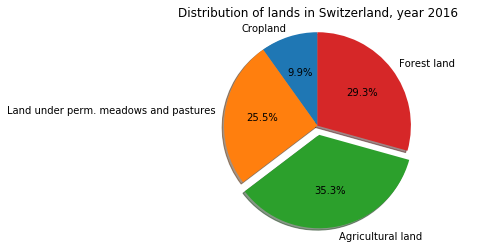

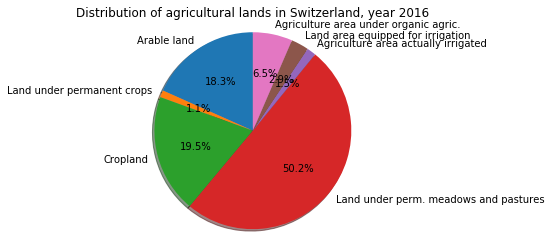

In [71]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
df_land = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Land area']
df_agri = raw_land_use_dataset.loc[raw_land_use_dataset['Area']=='Switzerland'].loc[raw_land_use_dataset['Year']==2016].loc[raw_land_use_dataset['Element']=='Share in Agricultural land']

labels1 = df_land.Item
sizes1 = df_land.Value
explode = (0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#plot = df_land.plot.pie(y='Value', figsize=(5, 5),labels=labels) #Another way to plot
fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode,labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.title.set_text('Distribution of lands in Switzerland, year 2016')
fig1.set_facecolor('white')

labels2 = df_agri.Item
sizes2 = df_agri.Value
fig1, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.title.set_text('Distribution of agricultural lands in Switzerland, year 2016')

fig1.set_facecolor('white')
plt.show()